# Exploratory Data Analysis - Immoscout

## 0. Imports und Daten einlesen

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = 50

df = pd.read_csv("../Data/immo_data.csv")
desc = pd.read_csv("../Data/immo_data_column_description.csv")

## 1. Datenanalyse mit Pandas 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

### 1.1 Spaltenbeschreibungen

In [3]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


### 1.2 Datenanalyse

In [3]:
df.drop(["scoutId", "houseNumber", "geo_bln", "geo_krs", "geo_plz", "date"], axis=1, inplace=True, errors="ignore")

In [4]:
df.shape

(268850, 43)

In [5]:
df[:10]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.00,1965.0,1.0,oil,False,True,2.0,595.00,86.00,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,2.0,gas,False,False,1.0,800.00,89.00,refurbished,normal,no,no_information,NaN,False,5,ground_floor,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.00,2019.0,1.0,NaN,False,True,9.0,965.00,83.80,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,NaN,district_heating,False,False,2.0,343.00,58.15,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.00,1950.0,NaN,gas,False,False,1.0,765.00,84.97,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,NaN,1999.0,NaN,gas,True,False,5.0,315.20,53.43,well_kept,NaN,no,Hardeseiche,Hardeseiche,False,2,apartment,2.0,165.0,NaN,NaN,2,False,2,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,380.00,NaN,NaN,NaN,False,True,NaN,310.00,62.00,fully_renovated,NaN,NaN,Am Bahnhof,Am_Bahnhof,False,2,NaN,2.0,NaN,1.0,4.0,2,True,3,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,584.25,1959.0,NaN,gas:electricity,False,True,2.0,452.25,60.30,NaN,NaN,NaN,Lesumer Heerstr.,Lesumer_Heerstr.,False,3,ground_floor,3.0,63.0,NaN,NaN,3,False,2,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,690.00,1970.0,1.0,oil,True,True,2.0,580.00,53.00,well_kept,sophisticated,no,no_information,NaN,False,4,roof_storey,2.0,138.0,2.0,2.0,2,False,2,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,NaN,1953.0,NaN,gas,False,True,2.0,300.00,60.00,well_kept,normal,negotiable,H&uuml;ttenstr.,Hüttenstr.,False,1,apartment,2.5,207.7,2.0,5.0,2,False,2,Gelsenkirchen

In [6]:
df.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
livingSpace                 float64
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                  object
lift                           bool
baseRentRange                 int64
typeOfFlat                   object
noRooms                     

In [7]:
df[['telekomUploadSpeed', 'livingSpace', 'heatingCosts']].describe().loc[['mean', 'min', 'max']]

,telekomUploadSpeed,livingSpace,heatingCosts
mean,28.804928,74.355548,76.990866
min,1.000000,0.000000,0.000000
max,100.000000,111111.000000,12613.000000


### 1.3 Kategorische (d.h. nicht-numerische) Daten

In [8]:
categorical_columns = df.select_dtypes(exclude=np.number).columns
df[categorical_columns].describe()

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,street,streetPlain,lift,typeOfFlat,garden,regio2,regio3,description,facilities,energyEfficiencyClass
count,268850,223994,236231,268850,268850,211886,268850,268850,200361,156185,154277,268850,197837,268850,232236,268850,268850,268850,249103,215926,77787
unique,16,13,3,2,2,132,2,2,10,4,3,52373,54490,2,10,2,419,8684,212621,189526,10
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,True,gas,False,True,well_kept,normal,negotiable,no_information,Hauptstraße,False,apartment,False,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+...,Laminat,C
freq,62863,128977,227632,247679,165734,110899,176794,172235,66591,81826,91970,71013,911,205528,131522,216093,13723,4751,216,207,14613


Attribute welche zu viele Ausprägungen bewirken könnten und entfernen

In [10]:
for c in categorical_columns:
    if len(df[c].unique()) > 50:
        print(c)
        df = df.drop(c, axis=1)
        


firingTypes
street
streetPlain
regio2
regio3
description
facilities


kategoriellen Attribute

In [15]:
display(df.describe(exclude=np.number))

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,hasKitchen,cellar,condition,interiorQual,petsAllowed,lift,typeOfFlat,garden,energyEfficiencyClass
count,268850,223994,236231,268850,268850,268850,268850,200361,156185,154277,268850,232236,268850,77787
unique,16,13,3,2,2,2,2,10,4,3,2,10,2,10
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,True,False,True,well_kept,normal,negotiable,False,apartment,False,C
freq,62863,128977,227632,247679,165734,176794,172235,66591,81826,91970,205528,131522,216093,14613


Die Häufigkeitsverteilung der verschiedenen Ausprägungen in einem Gitter

In [ ]:
dfc = df.select_dtypes(exclude=np.number).columns
_, axis = plt.subplots(5, 3, figsize=(15,40))
axis = axis.flat

for title, ax in zip(dfc,axis):
    ts = df.value_counts(df[title])
    ts.plot(kind='bar', ax=ax)

plt.tight_layout()    
plt.show()

### 1.4 Numerische Daten

In [9]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns].describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.327634,3.714544,6.941294e+02,74.355548,3.765256,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,8.361403,2.738134,1.953602e+04,254.759208,2.214357,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.000000,1.000000,3.380000e+02,54.000000,2.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.000000,3.000000,4.900000e+02,67.320000,3.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.000000,5.000000,7.990000e+02,87.000000,5.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


Entfernen von extremen *Ausreißer*

In [10]:
interesting_columns = ["serviceCharge", "totalRent", "yearConstructed", "noParkSpaces", "baseRent", "livingSpace", "noRooms", "numberOfFloors", "heatingCosts", "lastRefurbish"]
df.drop(["telekomHybridUploadSpeed"], axis=1, inplace=True, errors="ignore")

### 1.5 Untersuchung von Ausreißern

serviceCharge
totalRent
yearConstructed
noParkSpaces
baseRent
livingSpace
noRooms
numberOfFloors
heatingCosts
lastRefurbish


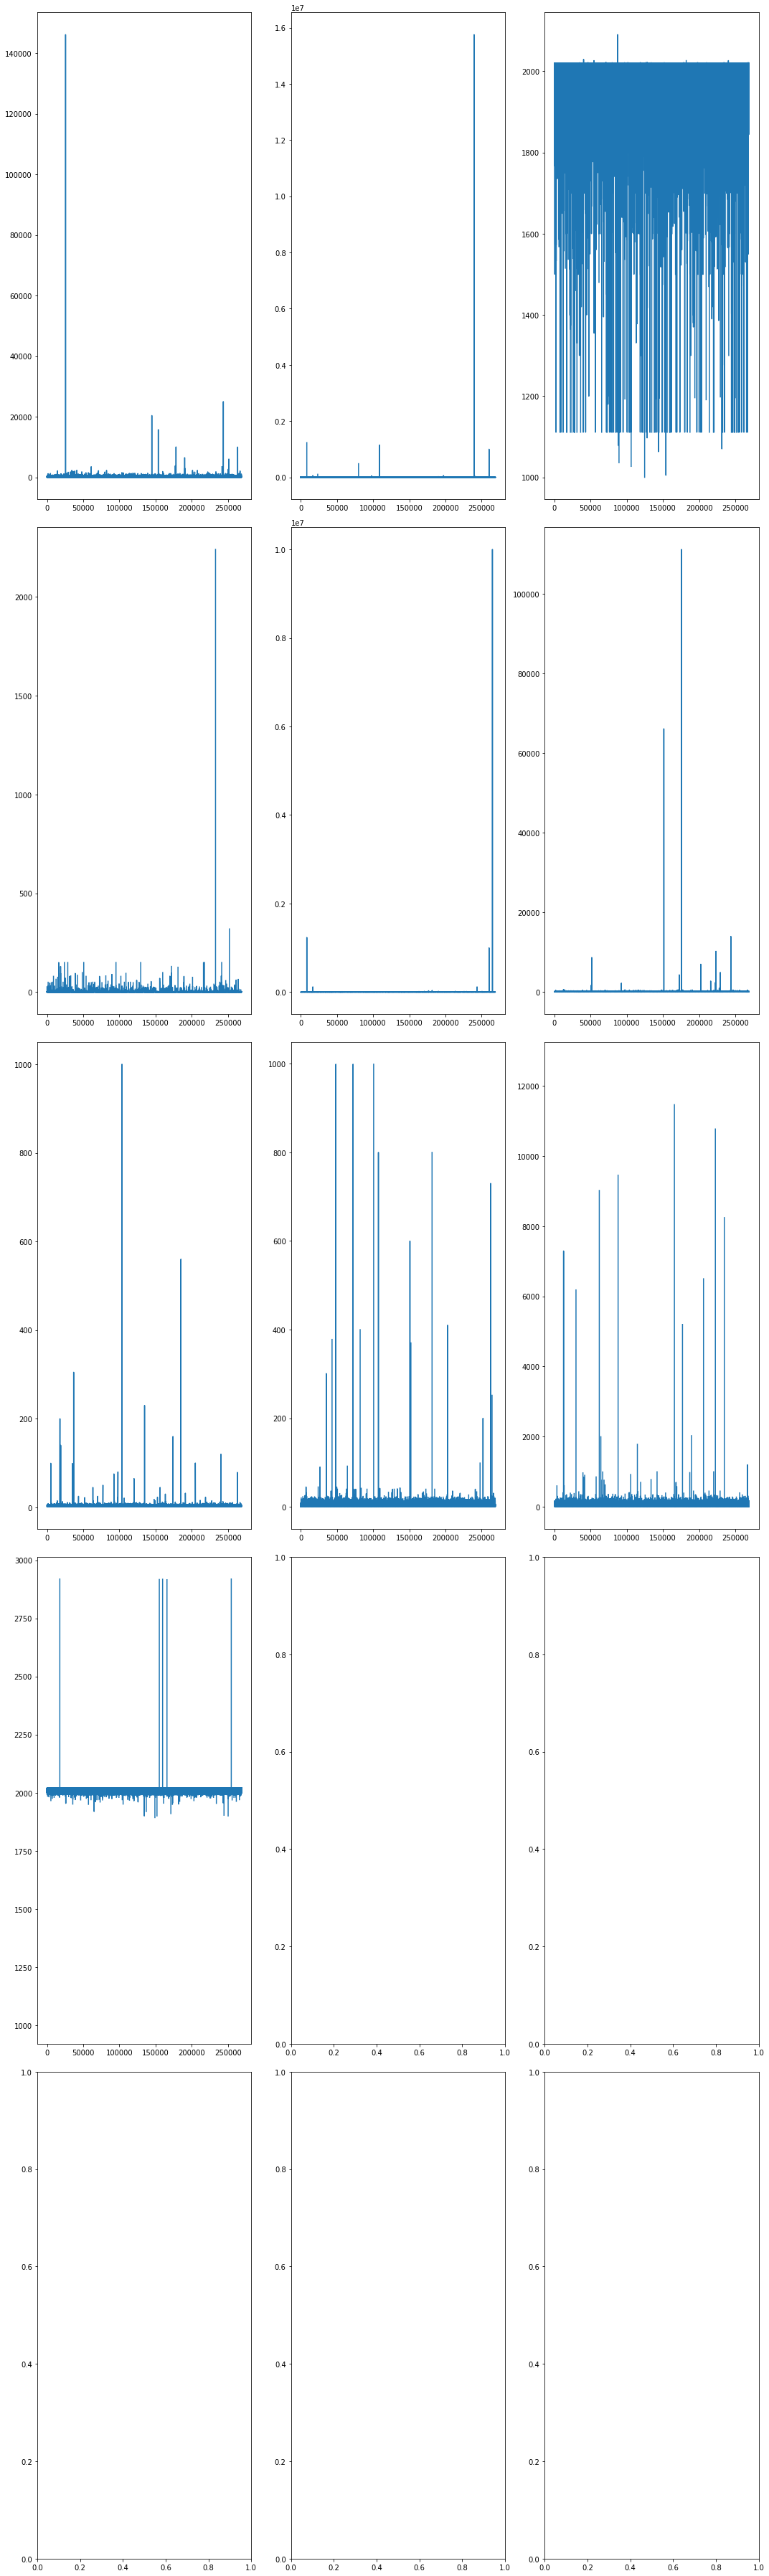

In [19]:
_, axis = plt.subplots(5, 3, figsize=(15,50))
axis = axis.flat

for title, ax in zip(interesting_columns,axis):
    ts = df[title]
    ts.plot(ax=ax)

plt.tight_layout()    
plt.show()

## 2. Datenbereinigung

In [11]:
display(df[interesting_columns].quantile(0.995))
display(df[interesting_columns].quantile(0.005))

serviceCharge       500.000
totalRent          3473.482
yearConstructed    2020.000
noParkSpaces         16.000
baseRent           3000.000
livingSpace         208.000
noRooms               6.000
numberOfFloors       14.000
heatingCosts        233.000
lastRefurbish      2020.000
Name: 0.995, dtype: float64

serviceCharge         0.00
totalRent           220.00
yearConstructed    1810.02
noParkSpaces          0.00
baseRent            152.00
livingSpace          18.00
noRooms               1.00
numberOfFloors        0.00
heatingCosts          0.00
lastRefurbish      1990.00
Name: 0.005, dtype: float64

In [12]:
upper_limits = df[interesting_columns].quantile(0.995)
lower_limits = df[interesting_columns].quantile(0.005)

df_reduced = df

# Für jede Spalte behalten wir: Daten die < (99.5%-Quantil) sind und > (0.5%-Quantil) sind ODER die NaN sind (damit befassen wir uns spaeter noch) 
for col in interesting_columns:
    df_reduced[col] = df[((df[col] < upper_limits[col]) & (df[col] > lower_limits[col])) | df[col].isna()][col]
    
df_reduced.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,256866.000000,268850.000000,267018.000000,235492.000000,226011.000000,208583.000000,88728.000000,211805.000000,266110.000000,265898.000000,268850.000000,239062.000000,162344.000000,217541.000000,168754.000000,268850.000000,268850.000000,82335.000000,76585.000000,46846.000000,46846.000000
mean,149.052401,9.791958,3.389001,28.804928,797.609664,1967.497668,1.150460,3.714544,631.585190,72.934556,3.765256,2.785106,114.749533,2.122405,3.465459,2.571542,3.070790,76.067077,2013.765293,89.113612,0.199769
std,74.347529,6.408399,1.964874,16.337151,473.202749,38.244860,0.656781,2.738134,422.363547,29.038426,2.214357,0.786649,61.653663,3.634934,1.583346,0.937594,1.407127,30.623961,6.997550,5.395805,0.009667
min,0.010000,0.000000,-12.330000,1.000000,220.010000,1811.000000,1.000000,1.000000,152.090000,18.060000,1.000000,1.100000,0.100000,-1.000000,1.000000,1.000000,1.000000,1.000000,1991.000000,71.430000,0.170500
25%,97.000000,6.000000,2.000000,10.000000,470.000000,1950.000000,1.000000,1.000000,339.957500,54.352500,2.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,55.000000,2012.000000,90.760000,0.191500
50%,135.000000,9.000000,3.390000,40.000000,650.000000,1972.000000,1.000000,3.000000,490.000000,67.380000,3.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,189.352500,13.000000,4.570000,40.000000,980.000000,1996.000000,1.000000,5.000000,795.000000,86.420000,5.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,499.430000,121.000000,14.920000,100.000000,3472.700000,2019.000000,15.000000,9.000000,2999.950000,207.750000,9.000000,5.500000,1996.000000,999.000000,13.000000,5.000000,7.000000,232.800000,2019.000000,90.760000,0.227600


### 2.1 Entfernen des Labels aus den Attributen

In [13]:
df_reduced = df_reduced[df_reduced["baseRent"].isna() == False] # Entfernen der Datensätze ohne Label

y = df_reduced["baseRent"]
df_reduced.drop(["baseRent", "totalRent","baseRentRange"], axis=1, inplace=True, errors="ignore") 

/var/folders/0v/bxcgmrsx22j402bsfjp3hg1h0000gn/T/ipykernel_17852/1533441336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.drop(["baseRent", "totalRent","baseRentRange"], axis=1, inplace=True, errors="ignore")


In [23]:
df_reduced

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,yearConstructed,noParkSpaces,hasKitchen,cellar,yearConstructedRange,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,1965.0,1.0,False,True,2.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,181.40,1.0,3.0,4,True,4,NaN,NaN,NaN,NaN,NaN
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,1871.0,2.0,False,False,1.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,NaN,3,False,4,NaN,NaN,2019.0,NaN,NaN
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,2019.0,1.0,False,True,9.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,NaN,3.0,4.0,3,False,4,NaN,NaN,NaN,NaN,NaN
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,1964.0,NaN,False,False,2.0,58.15,NaN,NaN,NaN,False,other,3.0,86.00,3.0,NaN,3,False,2,87.23,NaN,NaN,NaN,NaN
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,1950.0,NaN,False,False,1.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,188.90,1.0,NaN,3,False,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,2016.0,1.0,False,True,9.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,NaN,3,False,4,NaN,NaN,NaN,NaN,NaN
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1983.0,1.0,True,False,4.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,NaN,1.0,1.0,3,False,5,NaN,NaN,2015.0,NaN,NaN
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,1965.0,1.0,False,True,2.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,160.77,1.0,2.0,4,True,4,NaN,NaN,2019.0,NaN,NaN
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,2019.0,1.0,False,True,9.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,24.70,NaN,5.0,2,False,3,40.00,NO_INFORMATION,2019.0,NaN,NaN


### 2.2 Behandlung von fehlenden Datensätzen


In [14]:
df_reduced.isna().sum()

regio1                        0
serviceCharge             11029
heatingType               44203
telekomTvOffer            32302
newlyConst                    0
balcony                       0
picturecount                  0
pricetrend                 1813
telekomUploadSpeed        33036
yearConstructed           59703
noParkSpaces             178367
firingTypes               56259
hasKitchen                    0
cellar                        0
yearConstructedRange      56508
livingSpace                2285
condition                 67677
interiorQual             111423
petsAllowed              113060
street                        0
streetPlain               69933
lift                          0
typeOfFlat                36029
noRooms                   28459
thermalChar              105444
floor                     50637
numberOfFloors            98913
noRoomsRange                  0
garden                        0
livingSpaceRange              0
regio2                        0
regio3  

Auffüllen der NaN Werte

In [16]:
red_num = df_reduced.select_dtypes("number").columns
red_qua = df_reduced.select_dtypes("object").columns

imp_mean = SimpleImputer(missing_values=np.nan, strategy= 'mean').fit(df_reduced[red_num])
imp_most = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent').fit(df_reduced[red_qua])

df_reduced[red_num] = imp_mean.transform(df_reduced[red_num])
df_reduced[red_qua] = imp_most.transform(df_reduced[red_qua])

df_reduced

/var/folders/0v/bxcgmrsx22j402bsfjp3hg1h0000gn/T/ipykernel_17852/3755984742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[red_num] = imp_mean.transform(df_reduced[red_num])
/var/folders/0v/bxcgmrsx22j402bsfjp3hg1h0000gn/T/ipykernel_17852/3755984742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[red_qua] = imp_most.transform(df_reduced[red_qua])


,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,yearConstructedRange,livingSpace,condition,interiorQual,petsAllowed,street,streetPlain,lift,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6.0,4.62,10.000000,1965.0,1.000000,oil,False,True,2.0,86.00,well_kept,normal,negotiable,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,ground_floor,4.0,181.400000,1.000000,3.000000,4.0,True,4.0,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,76.184306,C,2013.774515,89.107728,0.199768
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8.0,3.47,10.000000,1871.0,2.000000,gas,False,False,1.0,89.00,refurbished,normal,no,no_information,Hauptstraße,False,ground_floor,3.0,114.838482,2.117551,3.458746,3.0,False,4.0,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,Laminat,76.184306,C,2019.000000,89.107728,0.199768
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8.0,2.72,2.400000,2019.0,1.000000,gas,False,True,9.0,83.80,first_time_use,sophisticated,negotiable,Turnerweg,Turnerweg,True,apartment,3.0,114.838482,3.000000,4.000000,3.0,False,4.0,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",76.184306,C,2013.774515,89.107728,0.199768
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9.0,1.53,40.000000,1964.0,1.146781,district_heating,False,False,2.0,58.15,well_kept,normal,negotiable,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,other,3.0,86.000000,3.000000,3.458746,3.0,False,2.0,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,Laminat,87.230000,C,2013.774515,89.107728,0.199768
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19.0,2.46,28.833909,1950.0,1.146781,gas,False,False,1.0,84.97,refurbished,normal,negotiable,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,apartment,3.0,188.900000,1.000000,3.458746,3.0,False,4.0,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,76.184306,C,2013.774515,89.107728,0.199768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0.0,2.74,10.000000,2016.0,1.000000,geothermal,False,True,9.0,90.00,mint_condition,sophisticated,no,no_information,Hauptstraße,False,roof_storey,3.0,114.838482,2.117551,3.458746,3.0,False,4.0,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,76.184306,C,2013.774515,89.107728,0.199768
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,12.0,6.49,28.833909,1983.0,1.000000,gas,True,False,4.0,115.00,well_kept,sophisticated,negotiable,no_information,Hauptstraße,False,apartment,3.5,114.838482,1.000000,1.000000,3.0,False,5.0,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",76.184306,C,2015.000000,89.107728,0.199768
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21.0,2.90,40.000000,1965.0,1.000000,gas,False,True,2.0,95.00,well_kept,normal,negotiable,Emsbachstrasse,Emsbachstrasse,False,apartment,4.0,160.770000,1.000000,2.000000,4.0,True,4.0,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",76.184306,C,2019.000000,89.107728,0.199768
268848,Nordrhein_We

## 3. Feature Engineering
### 3.1 Korrelationen

Scatter Plot für offensichtlich lineare oder nichtlineare Zusammenhänge zwischen einzelnen Features und der Zielvariable *baseRent* 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


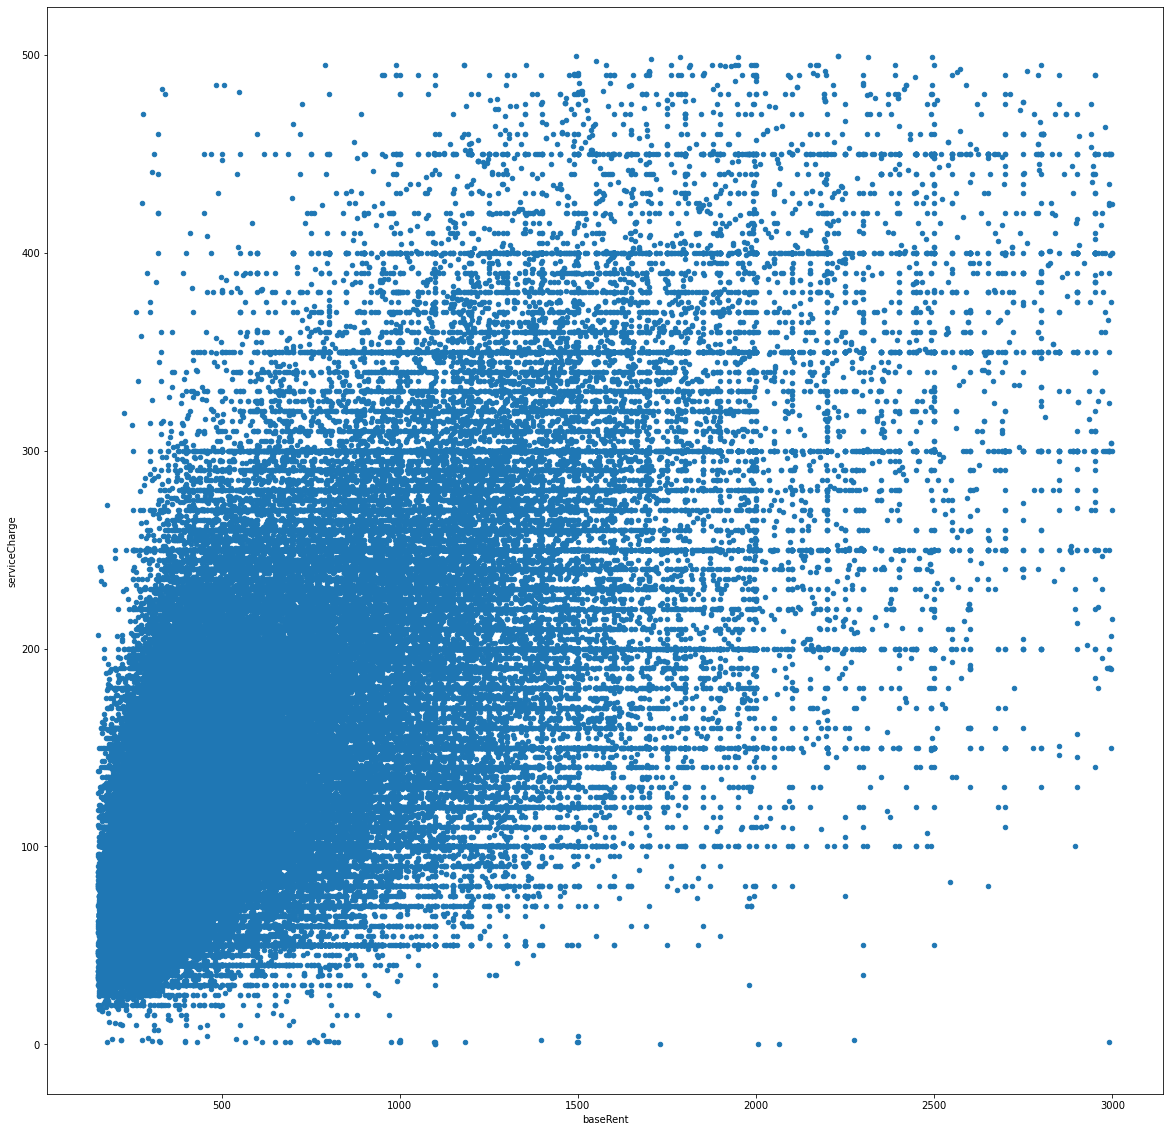

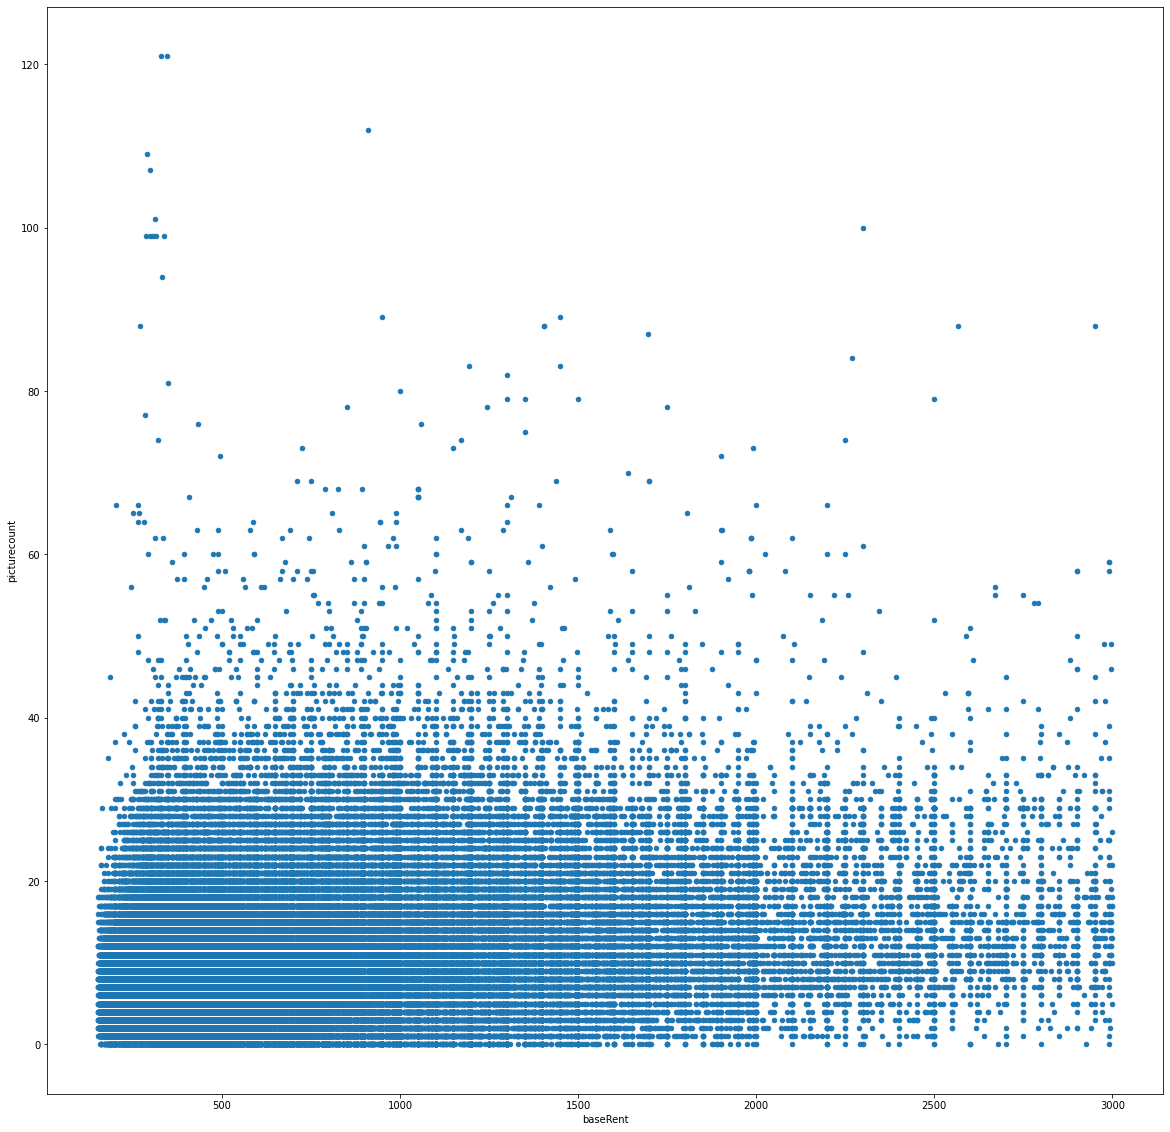

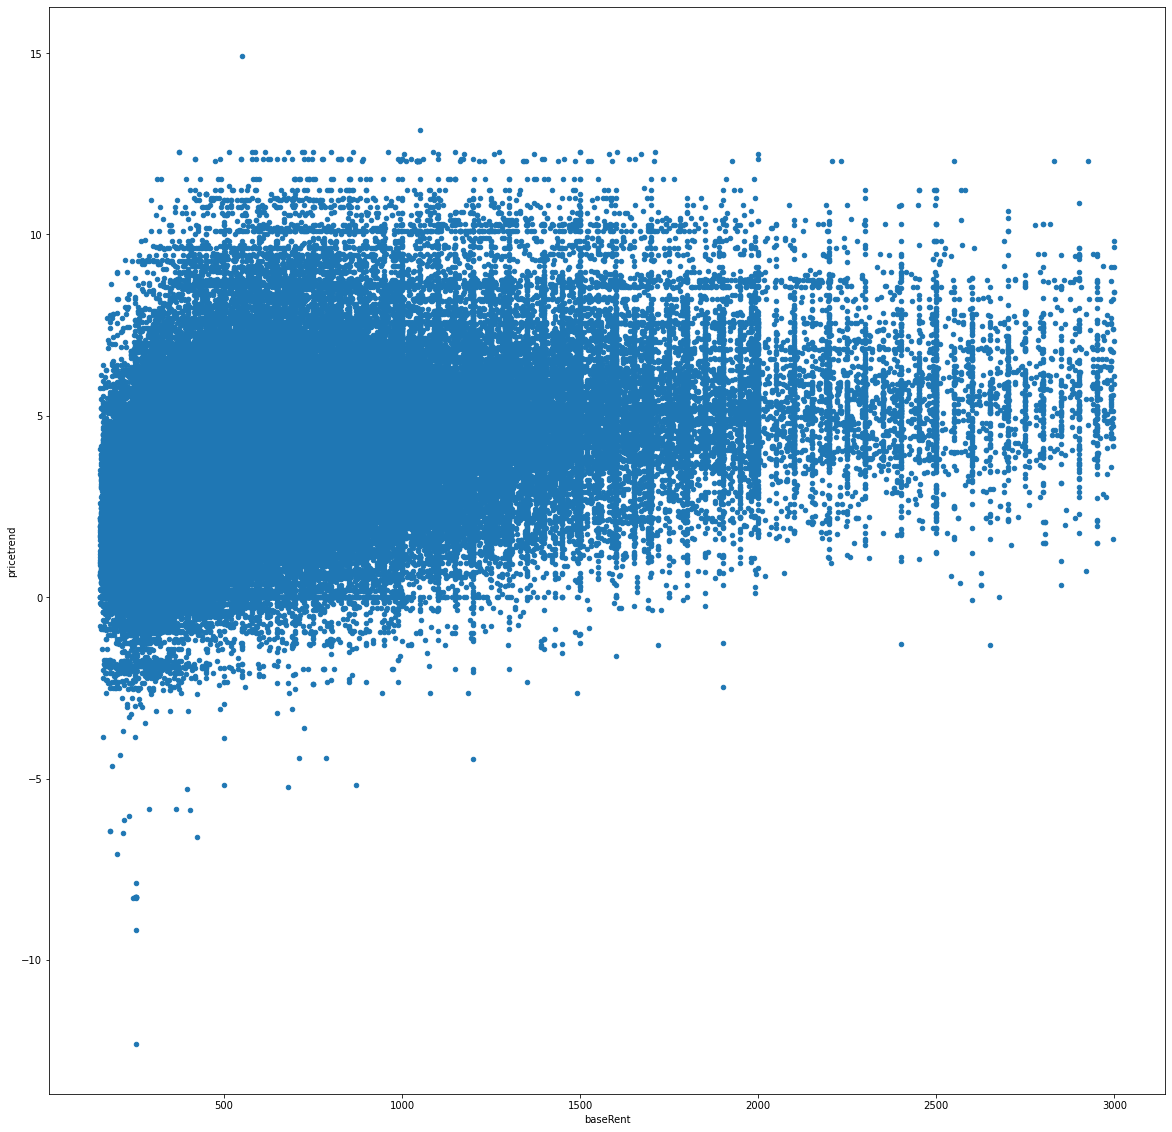

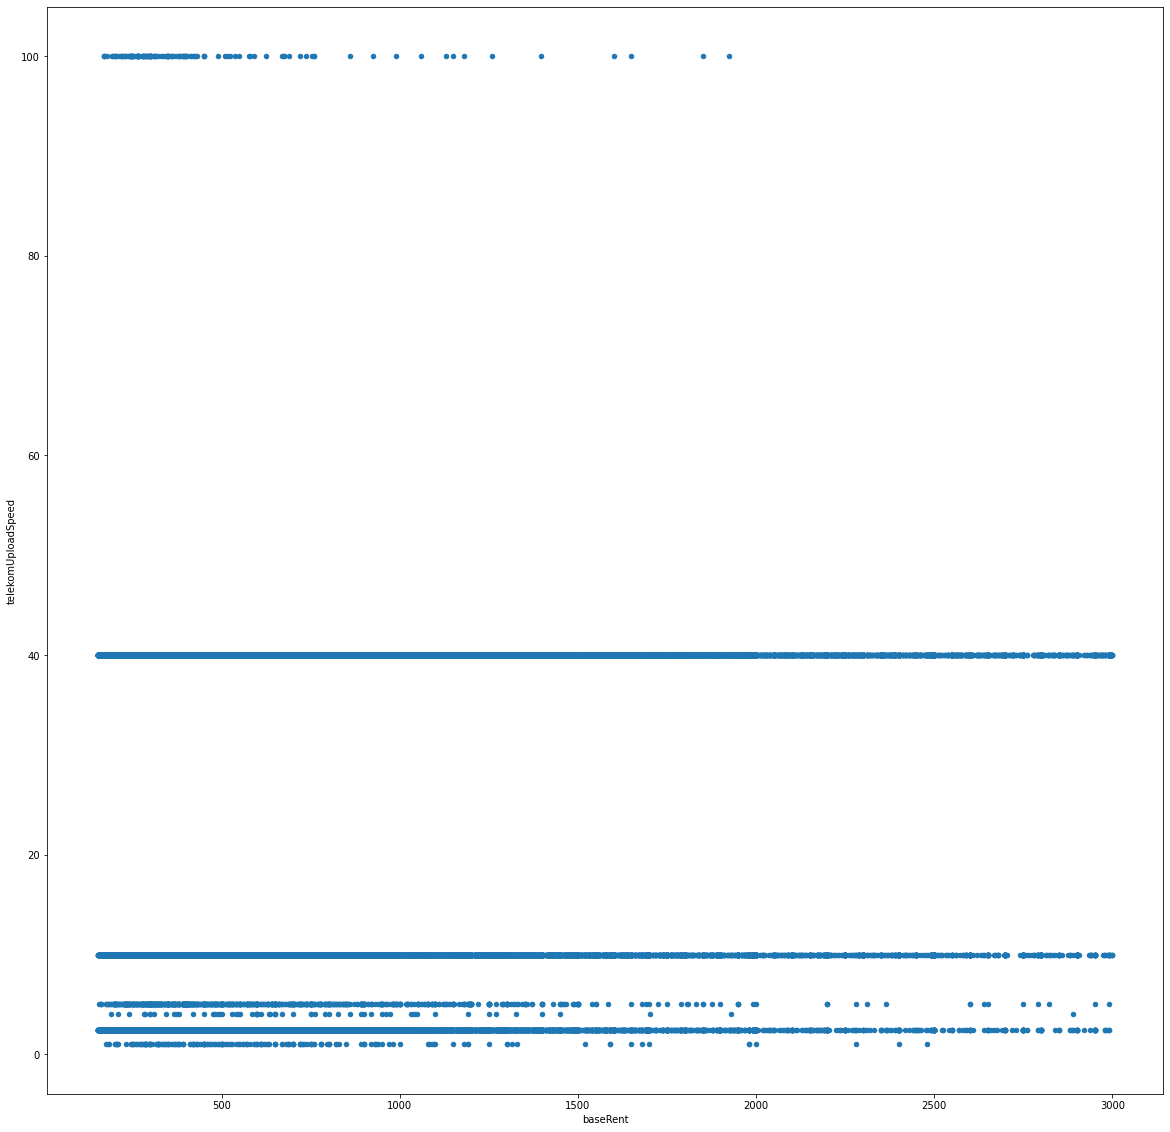

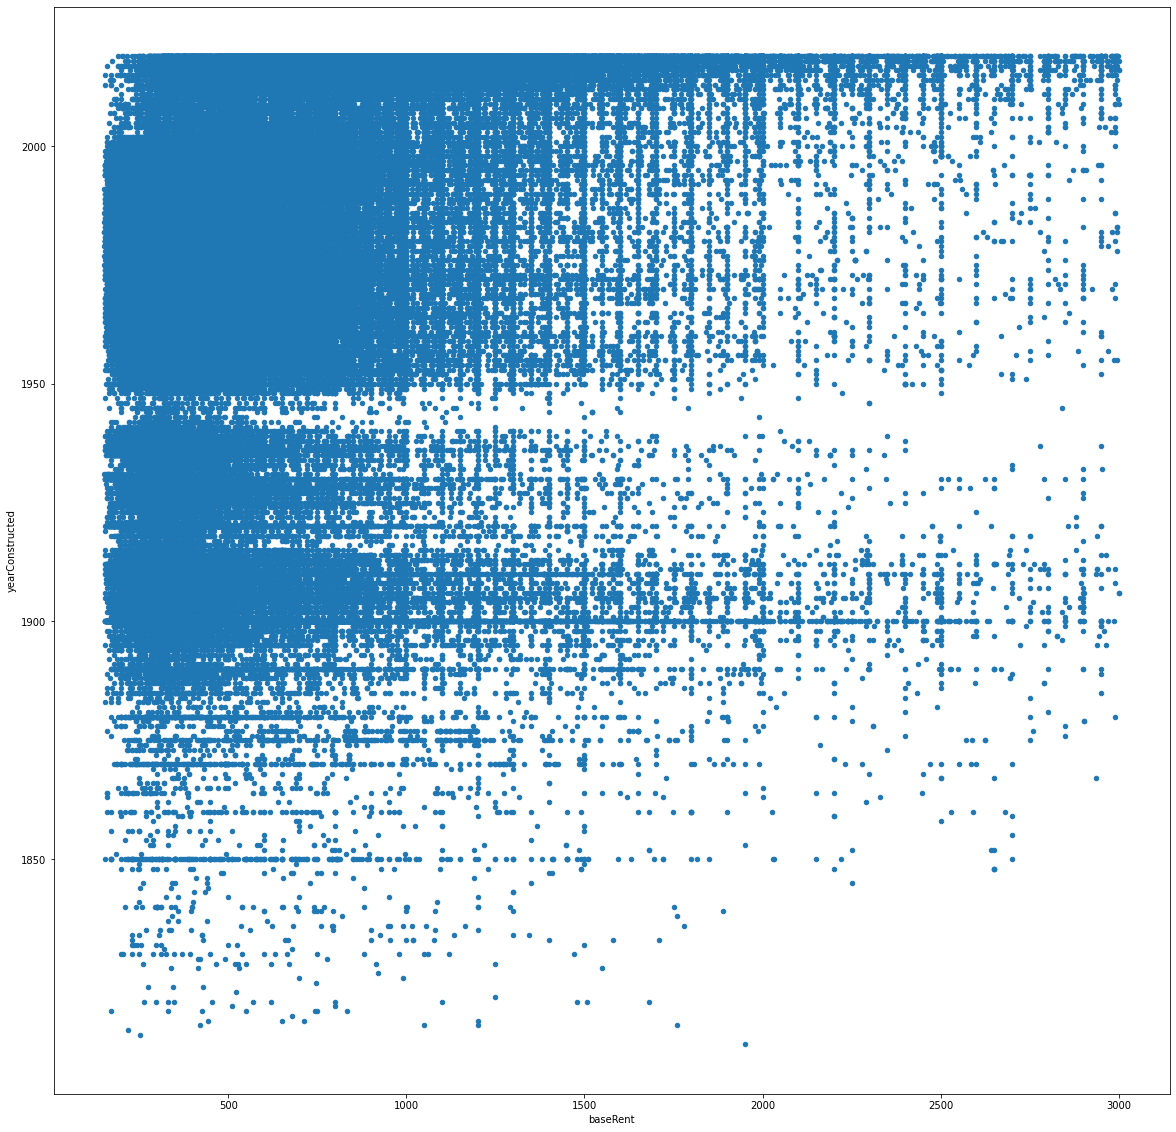

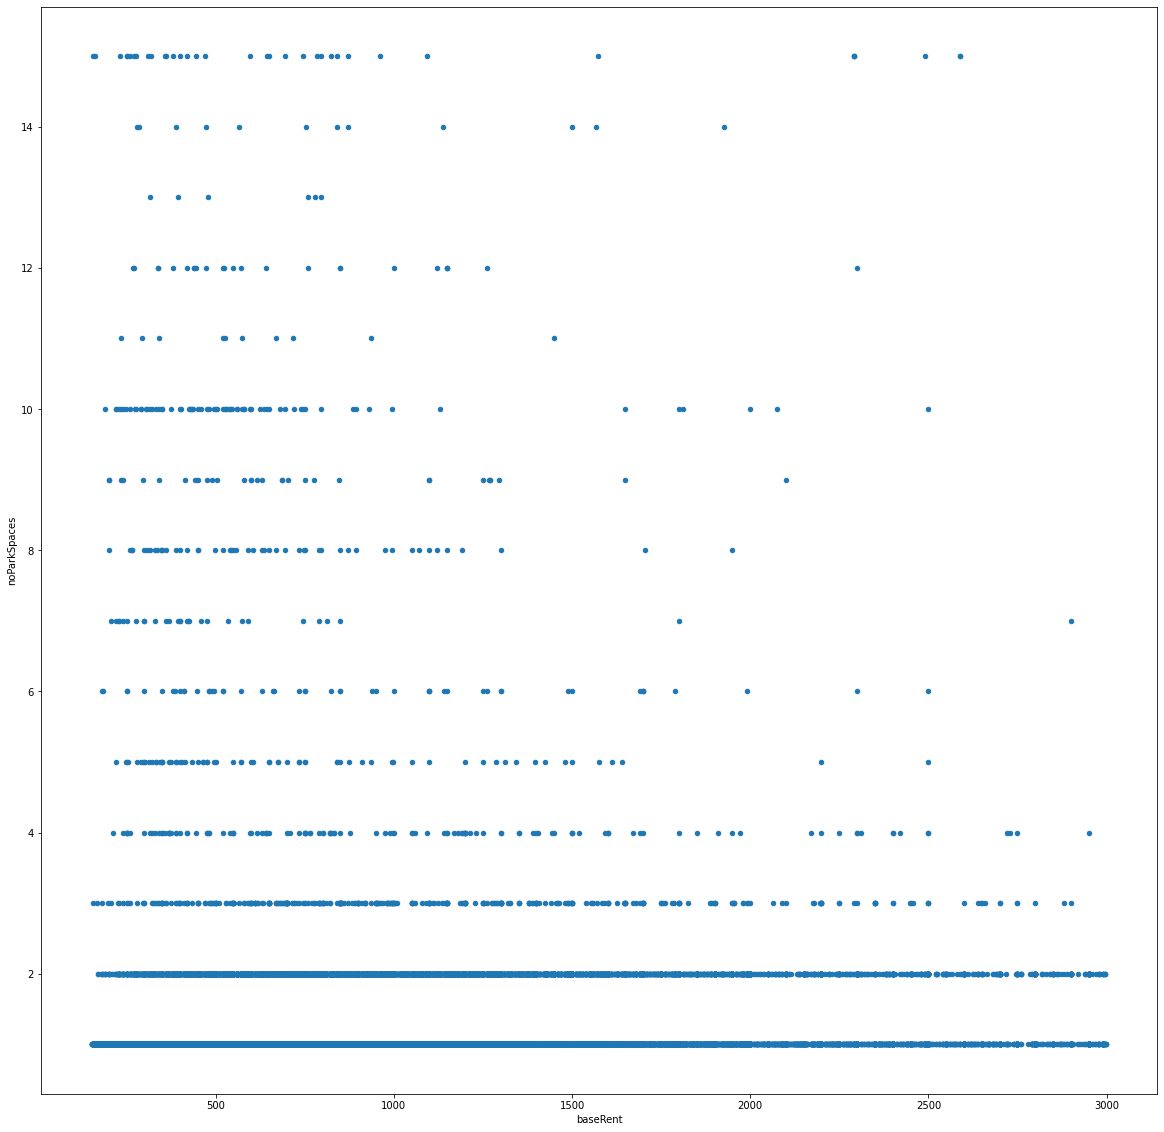

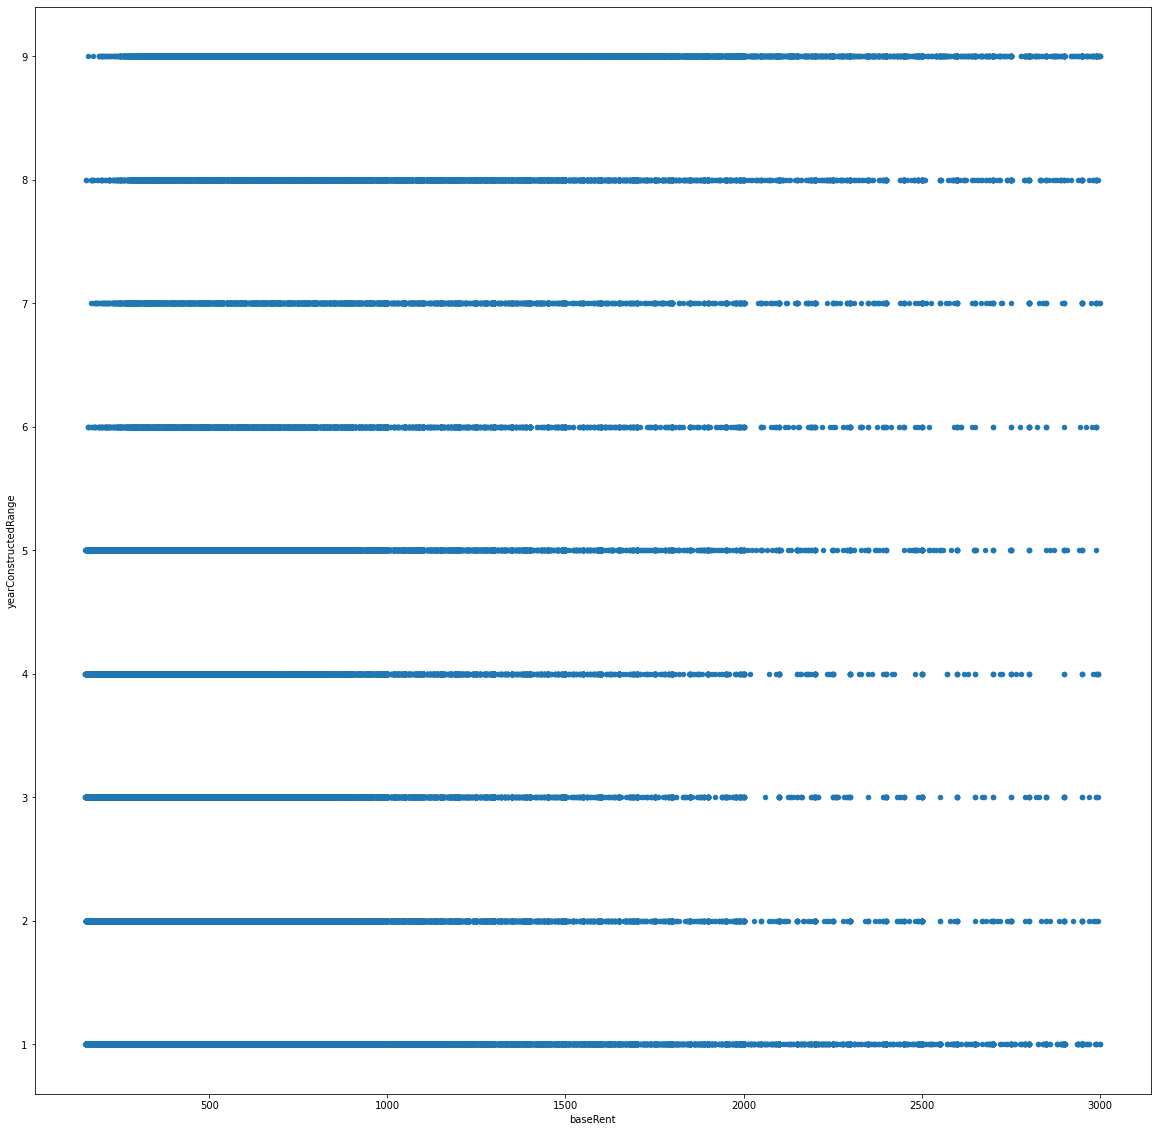

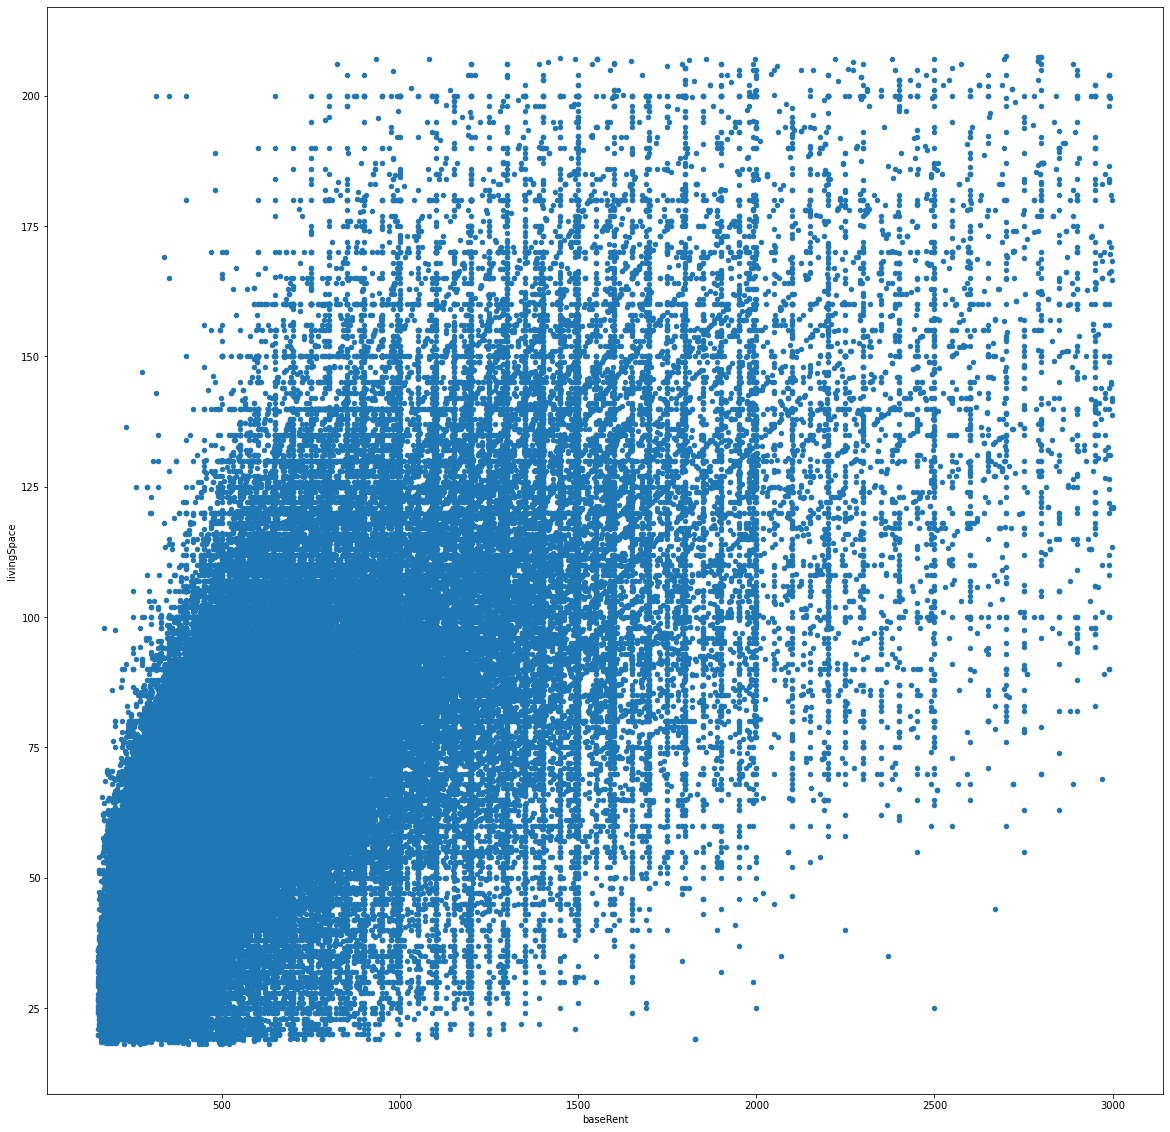

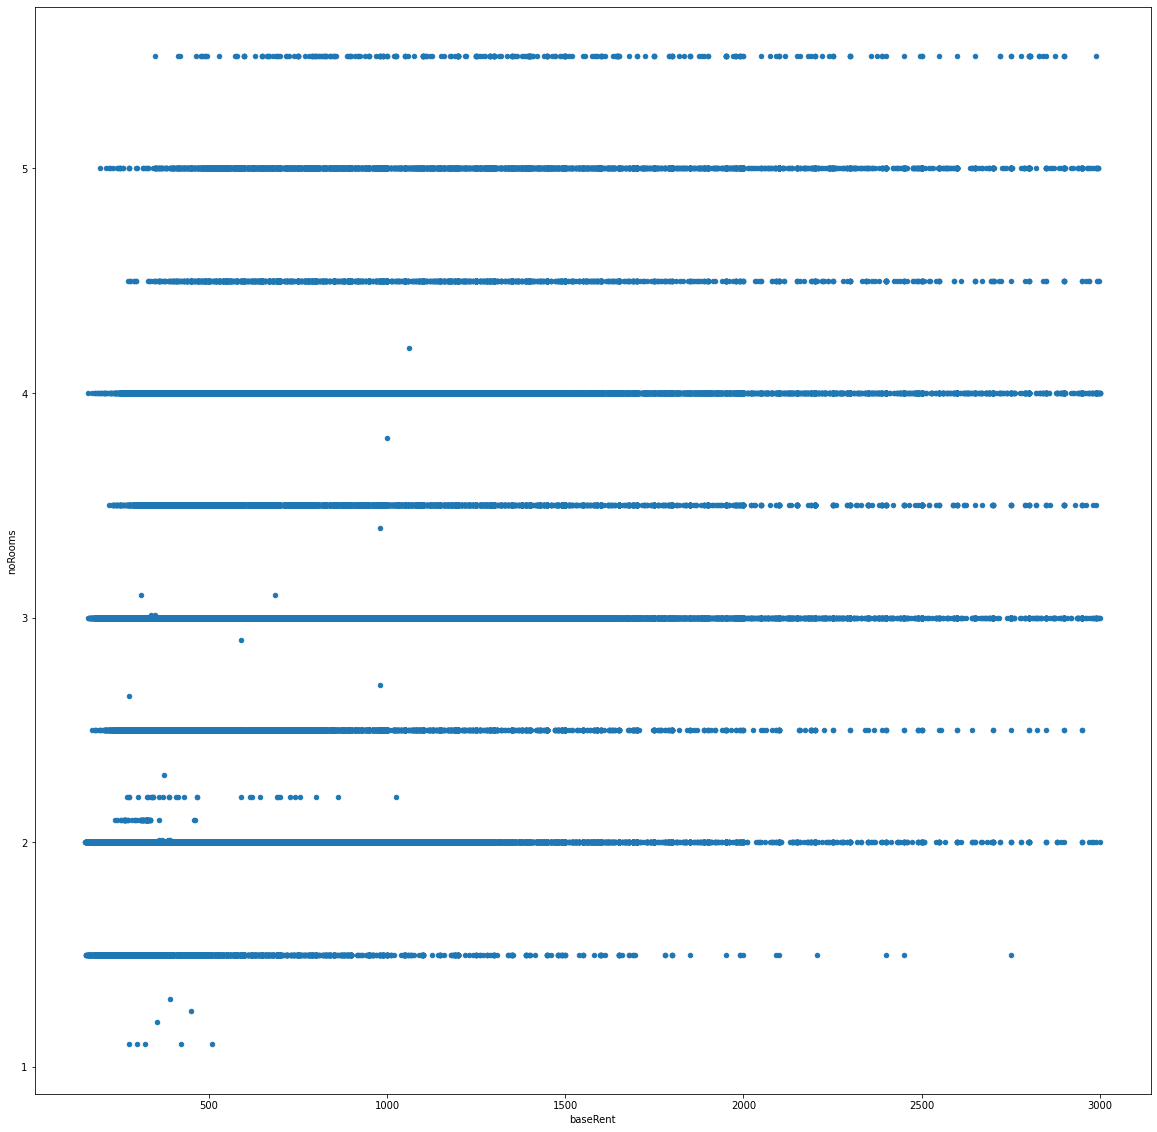

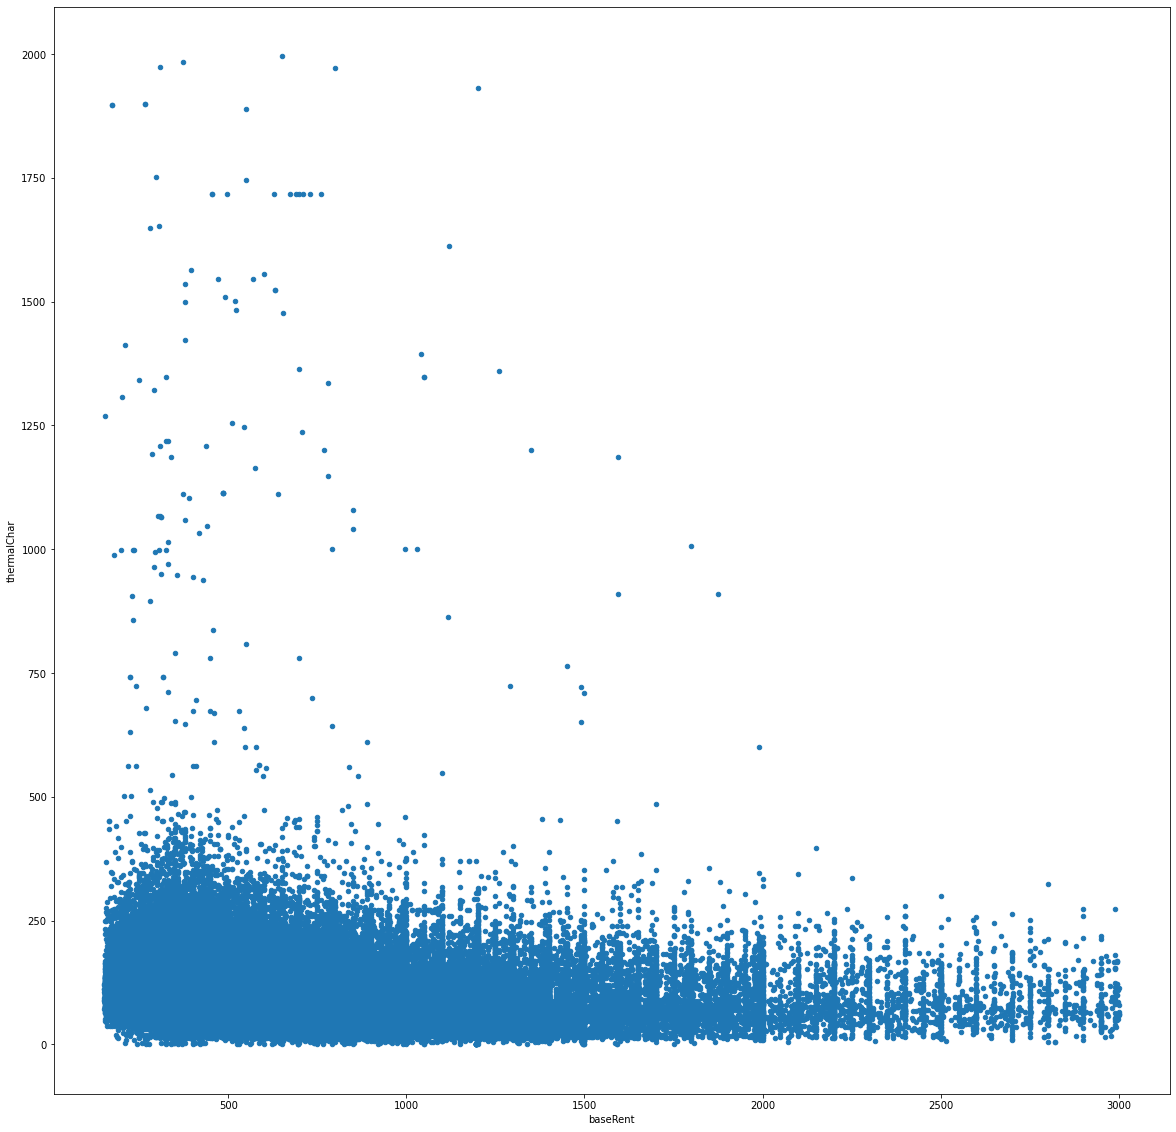

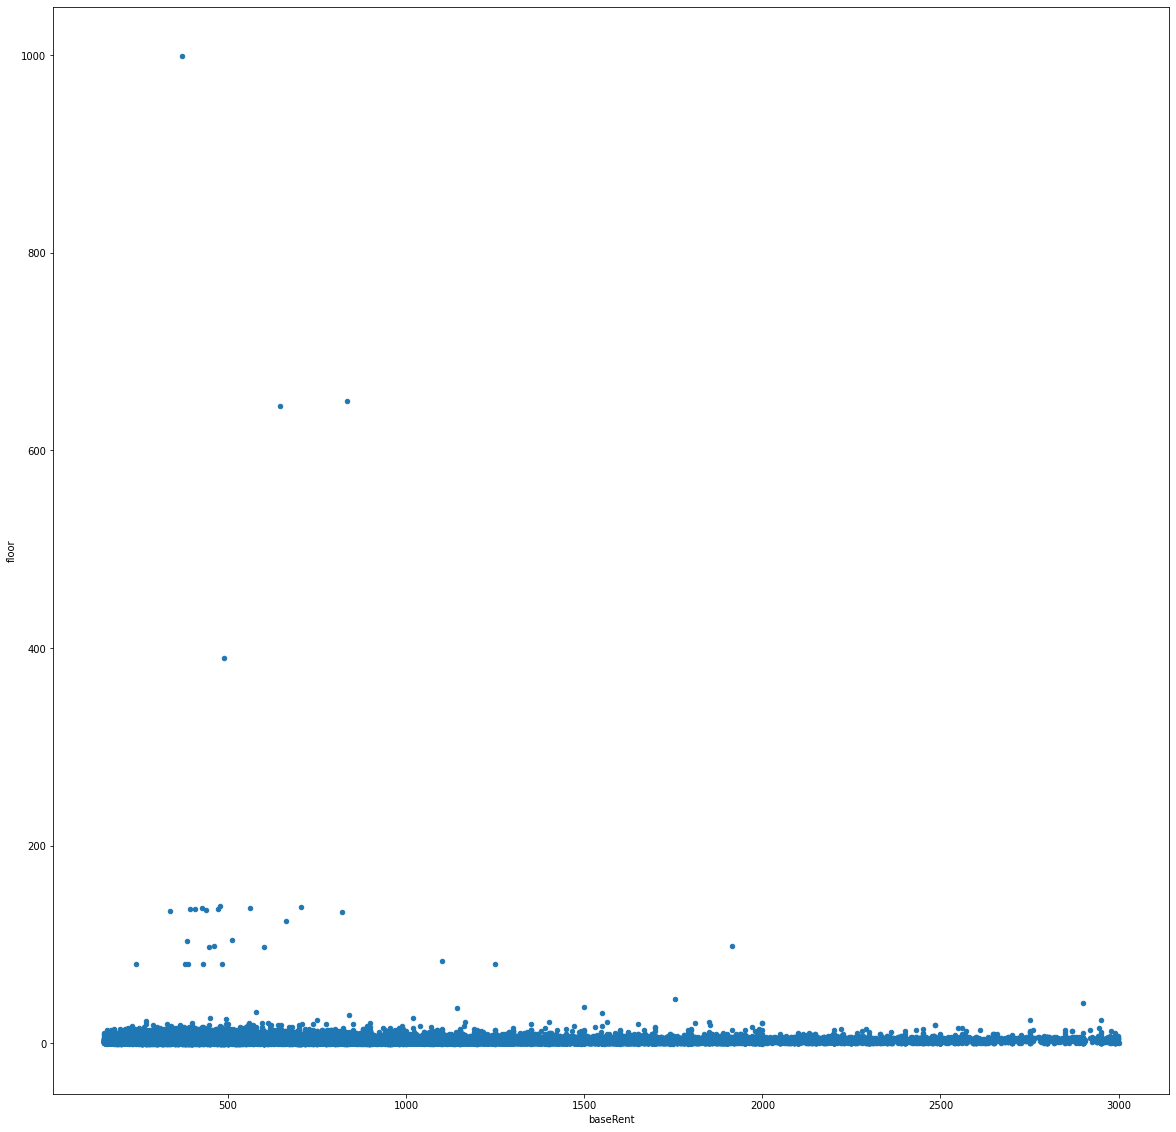

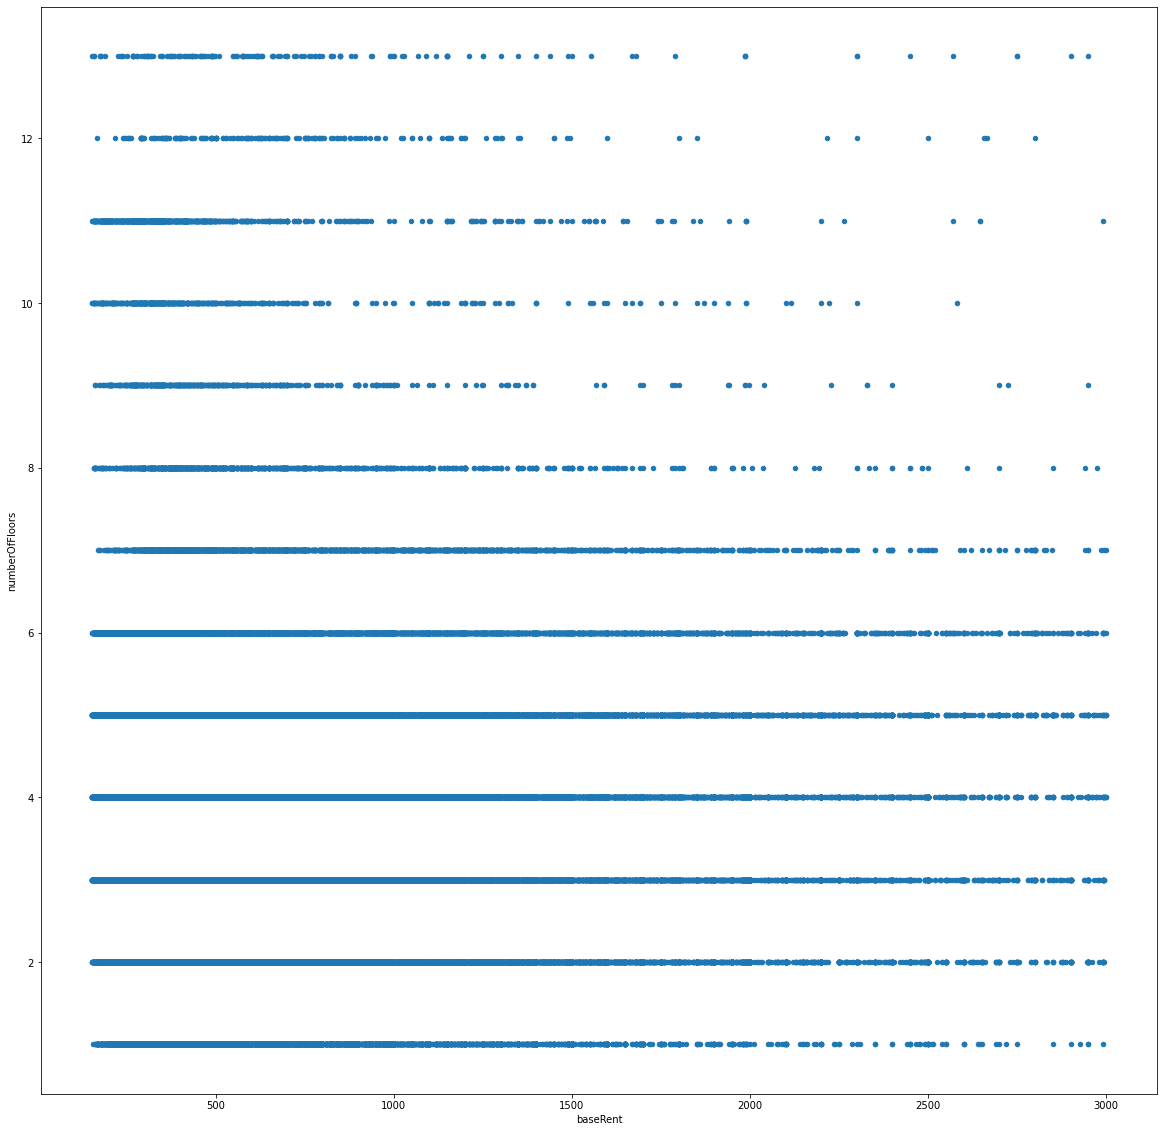

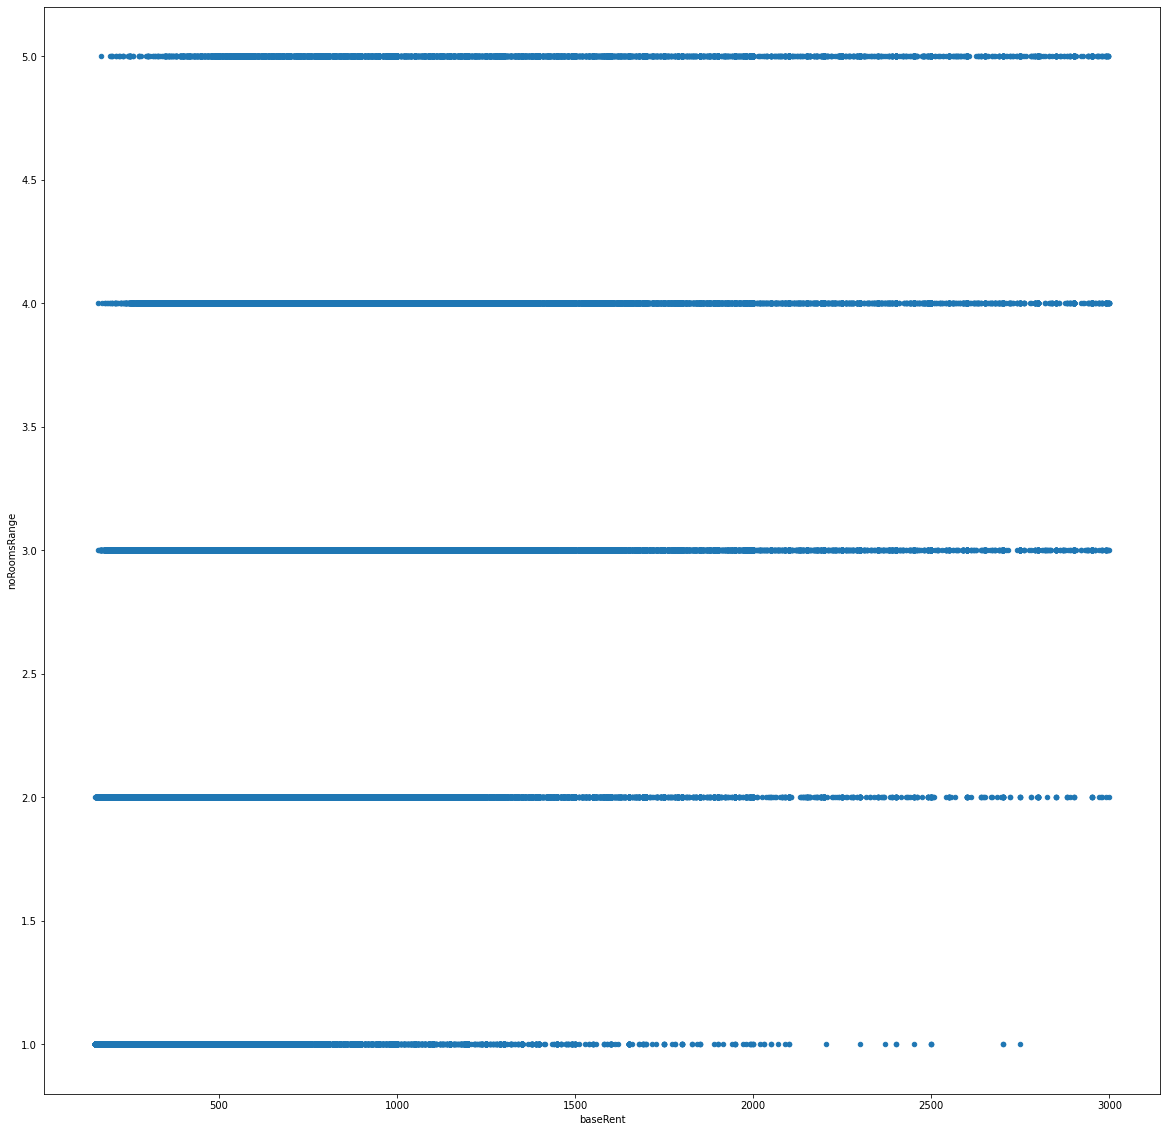

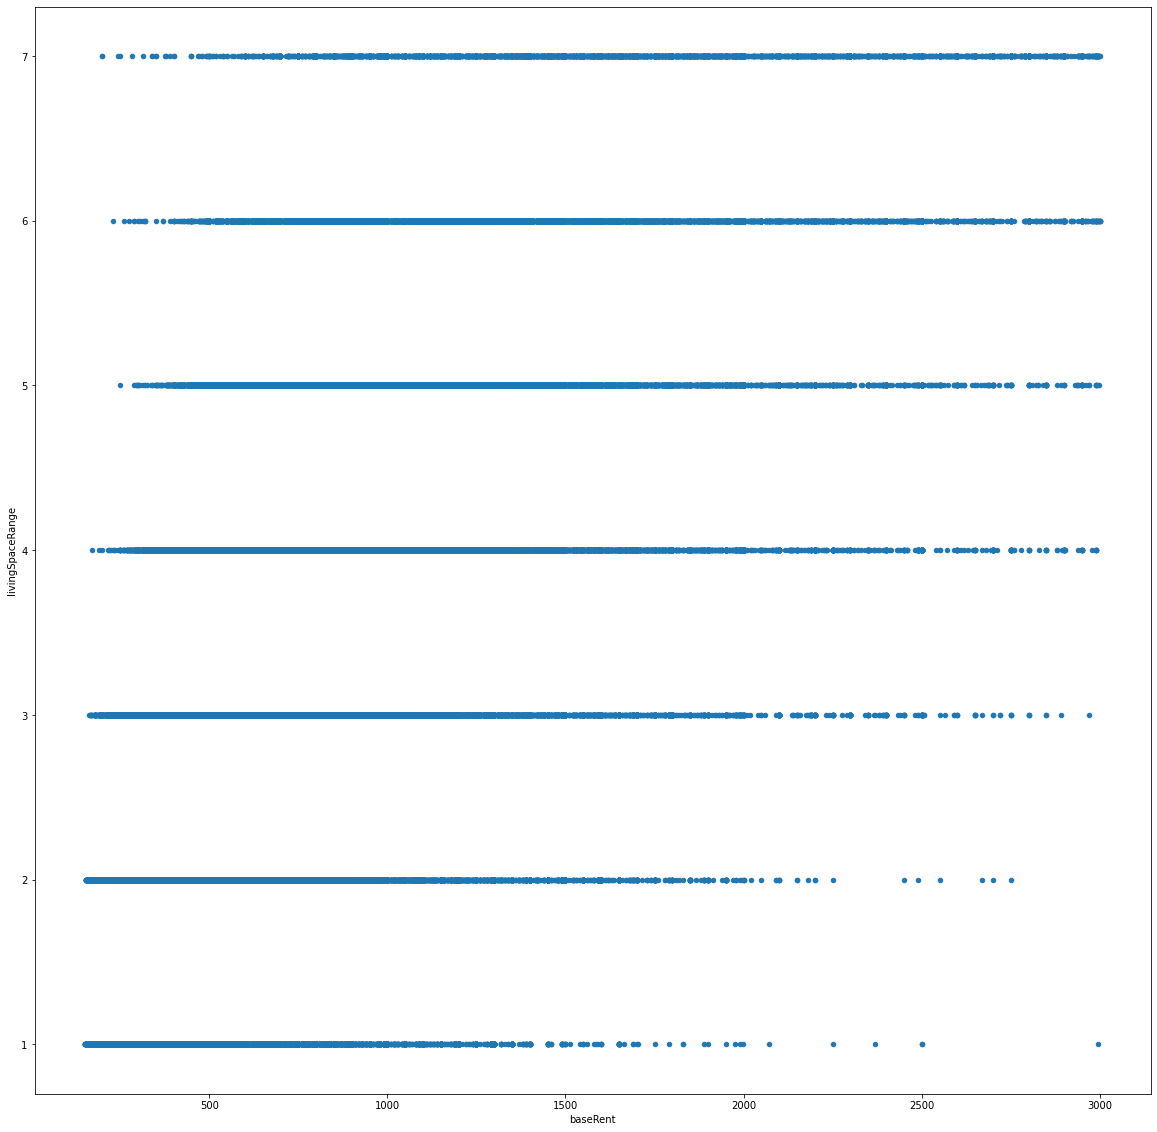

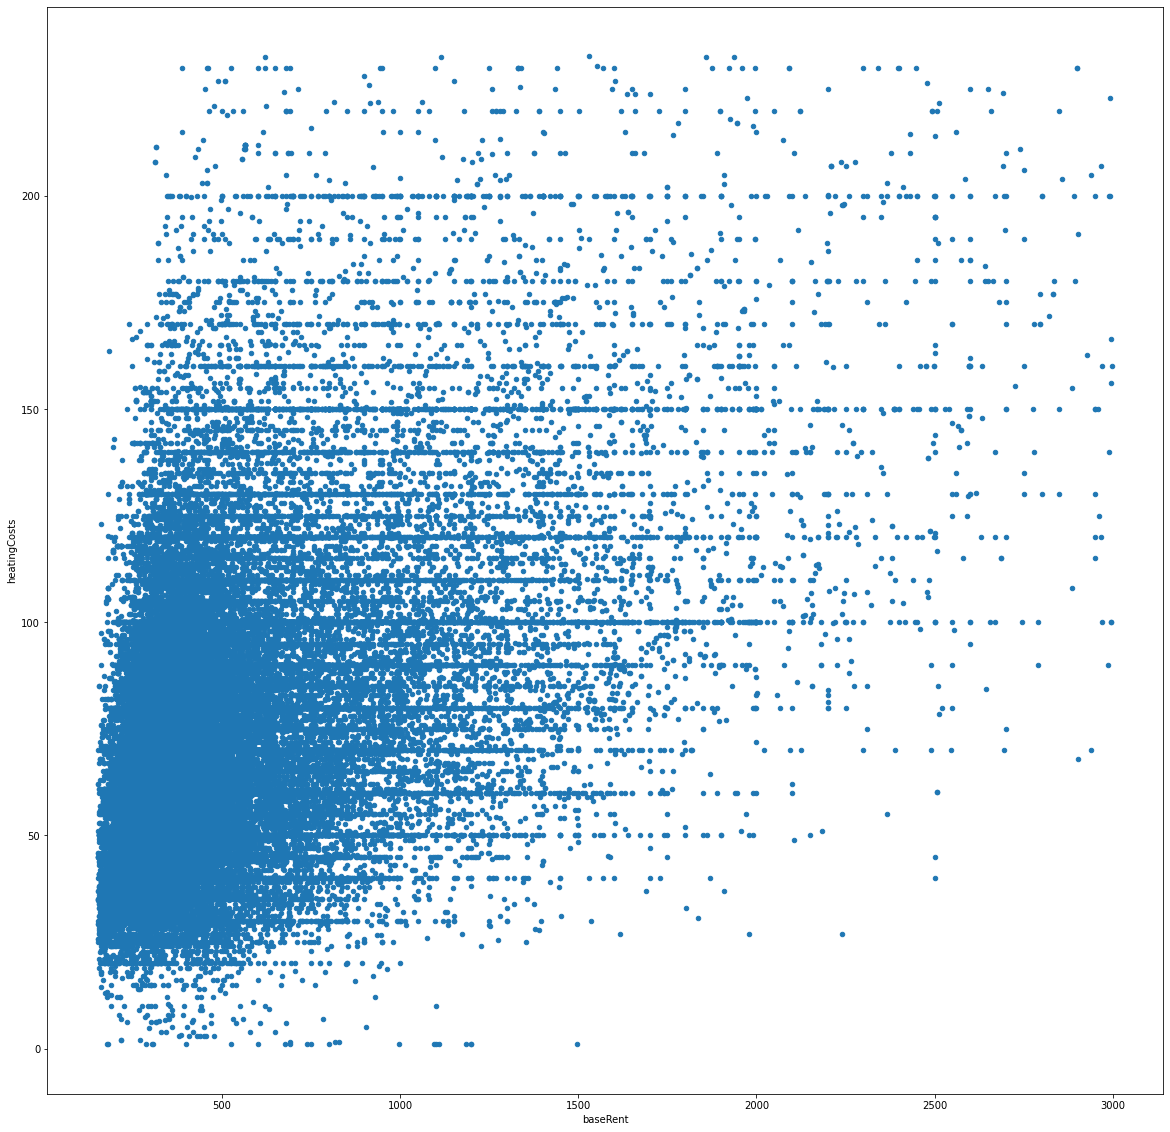

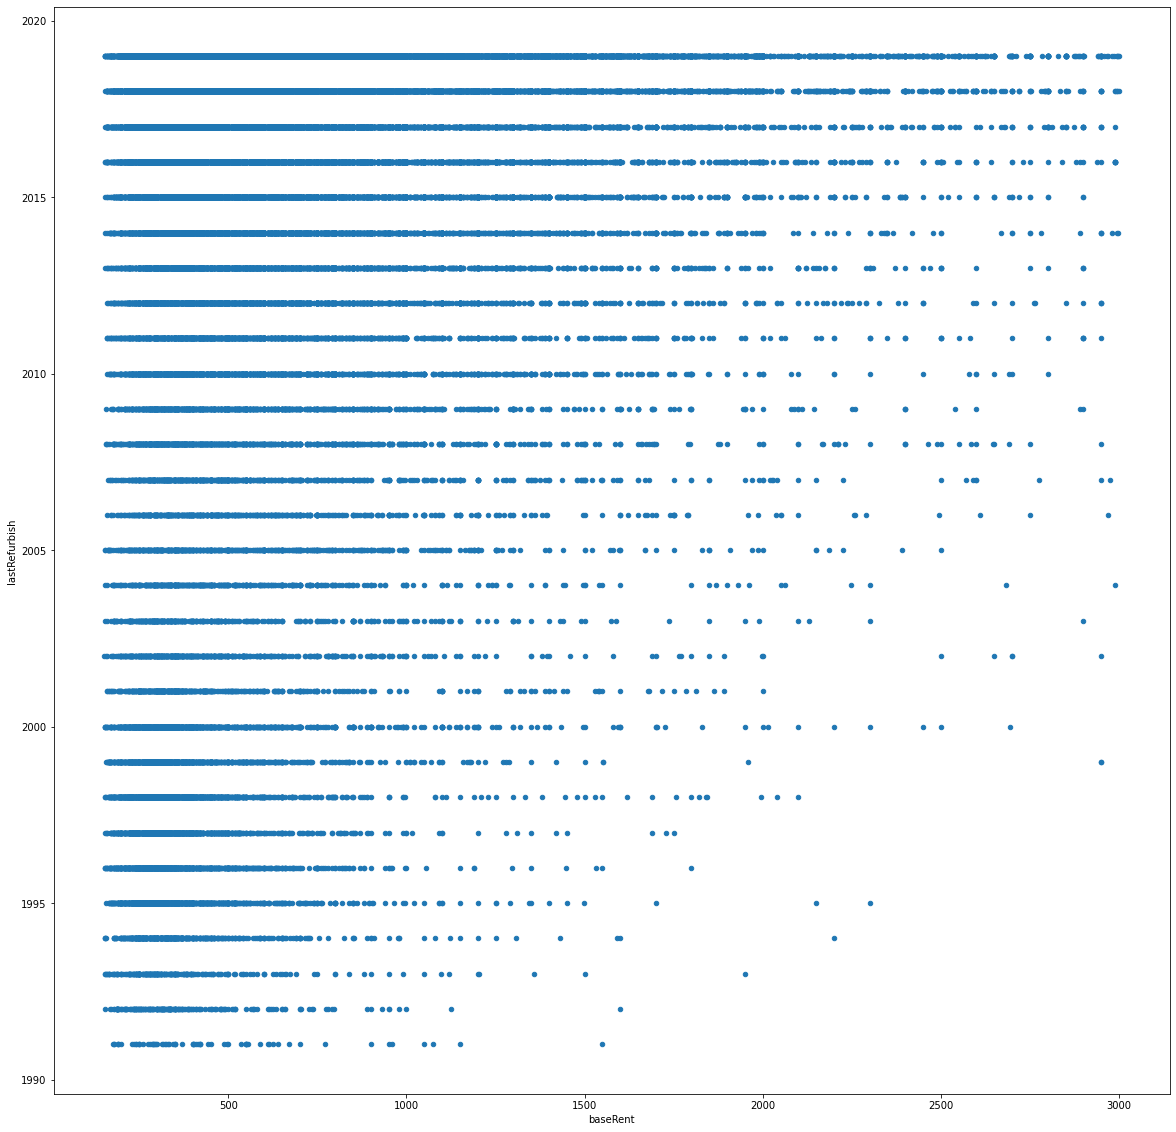

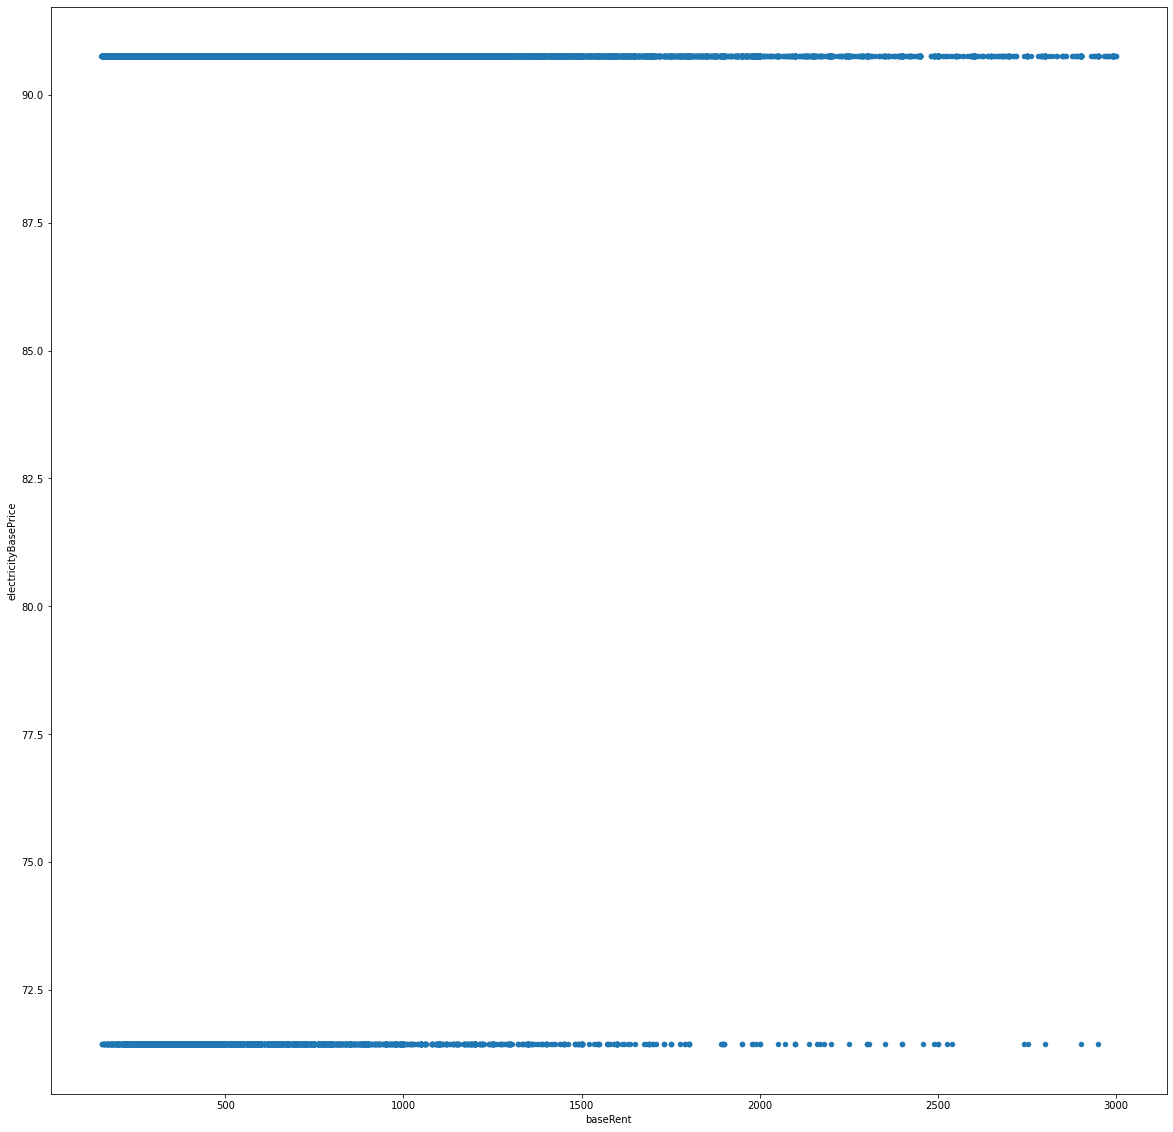

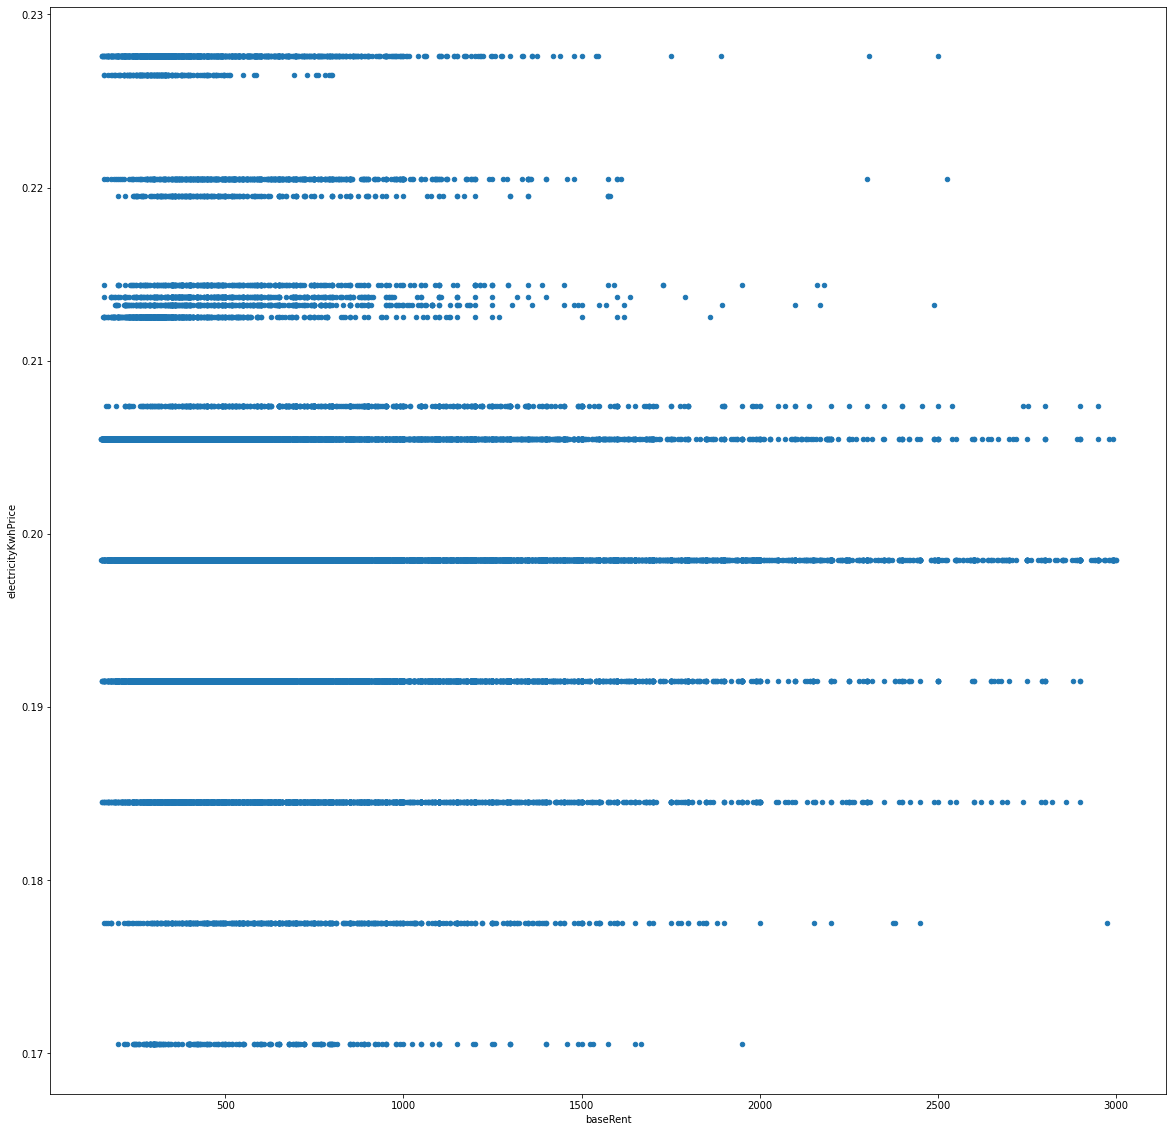

In [26]:
print(type(df))
print(type(df_reduced))
#baseerent nicht in df_rduced
for title in red_num:
    df.plot.scatter(x="baseRent", y=title, figsize=(20,20))

### 3.1 OneHot Encoding

In [ ]:
df_reduced = pd.concat([pd.get_dummies(df_reduced[red_qua]),df_reduced], axis=1)

In [ ]:
display(df_reduced)

In [29]:
df_reduced.shape

(266110, 101)